# Packages

In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import requests
import json

import country_converter as coco
cc = coco.CountryConverter()

/home/gpetrini/.local/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Composite Leading Indicators (MEI): OCDE

## Data

In [2]:
df = web.DataReader(
    'MEI_CLI', # https://stats.oecd.org/Index.aspx?DataSetCode=MEI_CLI
    'oecd', 
    start='2007-01-01'
)
df = df.transpose().loc[(
    "Amplitude adjusted (CLI)",
    #"Normalised (CLI)",
    #"Normalised (GDP)",
    #"Trend restored (CLI)",
),:]
df = df.reset_index()
df = df[df["Frequency"] == "Monthly"].drop(["Frequency"], axis='columns')
df = df.transpose()
df.columns = cc.convert(names = list(df.loc["Country"]), to = 'ISO3', not_found=None) # To avoid string problems
df.columns.name = ''
df.drop(['Country'], inplace=True)
df.index.name = ''
df.index = pd.date_range(
    start = df.index[0],
    end = f"{str(df.index[-1])[:6]}{int(str(df.index[-1])[6])+1}{str(df.index[-1])[7:]}",
    freq='M', 
)
df.to_csv('../data/CLI.csv')
df.tail()

/home/gpetrini/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


,IDN,ZAF,AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,...,G7,NAFTA,OECD - Total,OECD - Europe,Euro area (19 countries),LVA,OECD total,LTU,ISL,COL
2020-01-31,100.209,NaN,99.713,99.2521,99.0805,99.857,97.3937,99.0712,101.104,98.8564,...,98.3214,98.1243,98.7574,99.121,98.8991,NaN,NaN,NaN,95.4822,NaN
2020-02-29,100.273,NaN,99.9731,99.5779,99.6073,100.288,97.9158,99.3107,101.697,99.2655,...,98.777,98.5636,99.1799,99.581,99.3555,NaN,NaN,NaN,95.4859,NaN
2020-03-31,100.26,NaN,100.174,99.8564,100.083,100.633,98.3582,99.5499,102.188,99.5826,...,99.1696,98.9398,99.5328,99.959,99.7341,NaN,NaN,NaN,95.5204,NaN
2020-04-30,100.224,NaN,100.35,100.095,100.478,100.914,98.72,99.8142,102.587,99.7814,...,99.5023,99.2752,99.8259,100.252,100.029,NaN,NaN,NaN,95.5746,NaN
2020-05-31,100.195,NaN,100.503,100.306,100.798,101.133,99.0197,100.094,102.888,99.8809,...,99.773,99.5621,100.061,100.469,100.251,NaN,NaN,NaN,95.6323,NaN


## Visualization

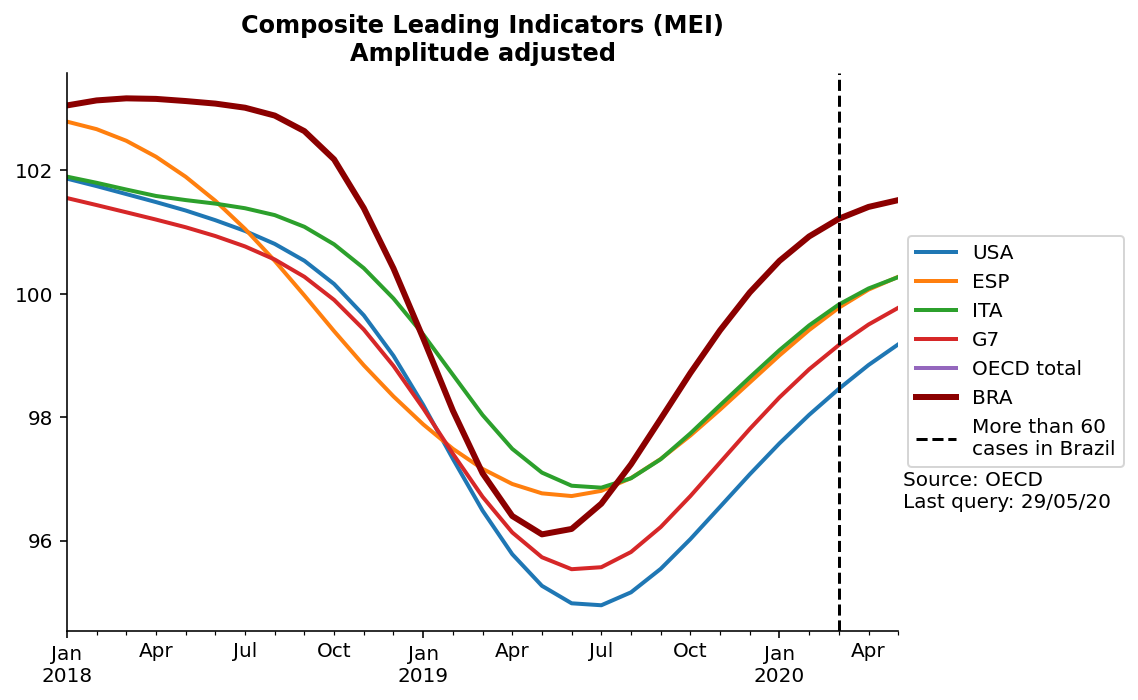

In [3]:
cases = ["USA", "ESP", "ITA", "G7", "OECD total "]
source = f"Source: OECD\nLast query: {dt.today():%d/%m/%y}"

fig, ax = plt.subplots(figsize=(8,5))

df['2018':][cases].plot(ax=ax, lw=2)
df['2018':][["BRA"]].plot(ax=ax, lw=3, color='darkred',)
ax.set_title("Composite Leading Indicators (MEI)\nAmplitude adjusted", fontweight='bold')
fig.text(0.79, .28, source, ha='left')
ax.axvline(x='2020-03-18', label='More than 60\ncases in Brazil',
           ls='--', color='black', lw=1.5, )
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
sns.despine()
plt.show()

# Consumer confidence index (CCI)

In [4]:
df = web.DataReader(
    'MEI_CLI', # https://stats.oecd.org/Index.aspx?DataSetCode=MEI_CCI
    'oecd', 
    start='2007-01-01'
)
df = df.transpose().loc[(
    'OECD Standardised CCI, Amplitude adjusted (Long term average=100), sa',
    #"Normalised (CLI)",
    #"Normalised (GDP)",
    #"Trend restored (CLI)",
),:]
df = df.reset_index()
df = df[df["Frequency"] == "Monthly"].drop(["Frequency"], axis='columns')
df = df.transpose()
df.columns = cc.convert(names = list(df.loc["Country"]), to = 'ISO3', not_found=None) # To avoid string problems
df.columns.name = ''
df.drop(['Country'], inplace=True)
df.index.name = ''
df.index = pd.date_range(
    start = df.index[0],
    end = f"{str(df.index[-1])[:6]}{int(str(df.index[-1])[6])+1}{str(df.index[-1])[7:]}",
    freq='M', 
)
df.to_csv('../data/CCI.csv')
df.tail()

/home/gpetrini/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


,IDN,ZAF,AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,...,G7,NAFTA,OECD - Total,OECD - Europe,Euro area (19 countries),LVA,OECD total,LTU,ISL,COL
2020-01-31,100.254,100.29,101.609,99.8015,100.472,99.5011,99.4339,101.17,100.322,99.0741,...,98.8022,NaN,99.0083,99.4189,99.2933,84.1222,98.6915,90.6823,NaN,99.8576
2020-02-29,100.177,100.389,101.766,99.9634,100.536,99.5456,99.6085,101.083,100.686,99.4594,...,98.9113,NaN,99.1083,99.6036,99.5477,84.2613,98.7236,90.3351,NaN,99.8692
2020-03-31,100.085,100.59,101.695,100.095,100.569,99.5466,99.8692,100.994,100.967,99.7904,...,98.9578,NaN,99.1469,99.7066,99.7024,84.8029,98.7113,89.9478,NaN,99.9171
2020-04-30,100.01,100.868,101.6,100.195,100.469,99.786,99.9077,101.064,101.348,99.9568,...,99.0517,NaN,99.2232,99.7576,99.7568,85.7132,98.8041,89.9563,NaN,99.8859
2020-05-31,99.9959,101.211,101.632,100.23,100.359,100.148,99.7768,101.232,101.696,100.007,...,99.1488,NaN,99.3148,99.7955,99.7241,87.3571,98.9431,90.3396,NaN,99.9279


## Visualization

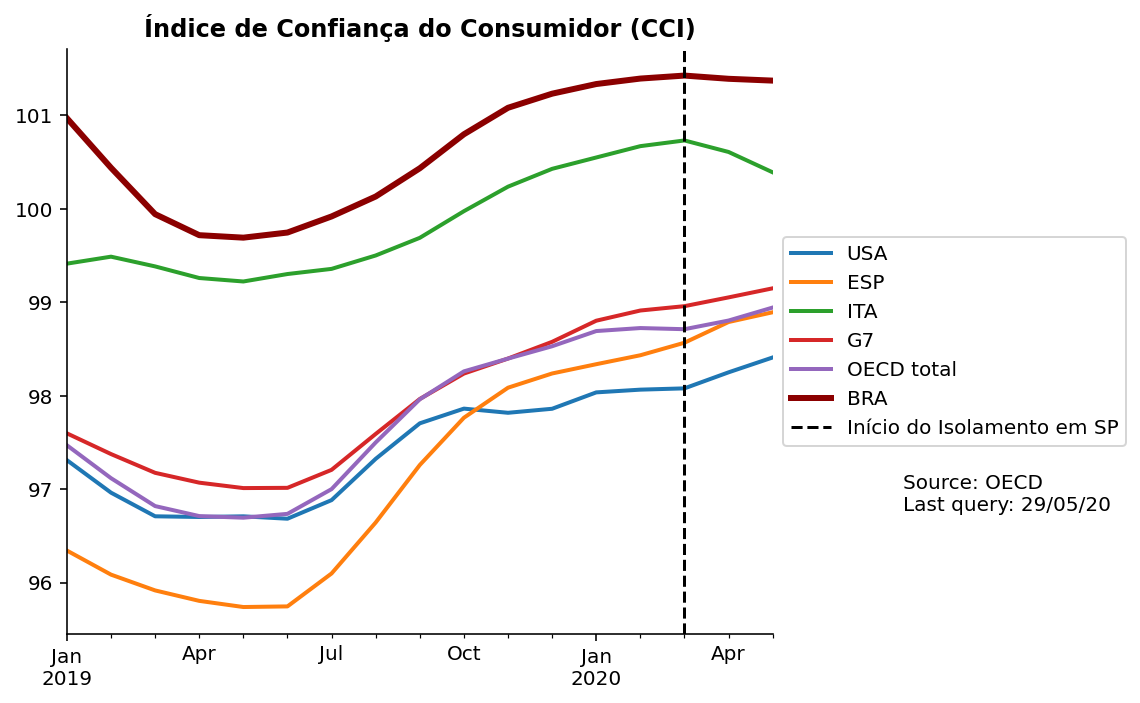

In [5]:
cases = ["USA", "ESP", "ITA", "G7", "OECD total "]
source = f"Source: OECD\nLast query: {dt.today():%d/%m/%y}"

fig, ax = plt.subplots(figsize=(8,5))

df['2019':][cases].plot(ax=ax, lw=2)
df['2019':][["BRA"]].plot(ax=ax, lw=3, color='darkred',)
ax.set_title("Índice de Confiança do Consumidor (CCI)", fontweight='bold')
fig.text(0.79, .28, source, ha='left')
ax.axvline(x='2020-03-24', label='Início do Isolamento em SP',
           ls='--', color='black', lw=1.5, )
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
sns.despine()
plt.show()

# GDP growth rates (QoQ)

## Data

In [6]:

df = pd.read_csv(
    '../data/QNAraw.csv',
)
df = df[['Value', "TIME", "LOCATION"]]
df = pd.pivot_table(
    df, 
    values="Value", 
    index="TIME", 
    columns="LOCATION"
)
df.index = pd.date_range(
    start = "31/03/2018",
    end = "31/03/2020",
    freq='Q', 
)
df.index.name=''
df.columns.name=''
df.to_csv('../data/GDP_QoQ_Growth.csv')
df

,ARG,AUS,AUT,BEL,BGR,BRA,CAN,CHE,CHL,CHN,...,PRT,ROU,RUS,SAU,SVK,SVN,SWE,TUR,USA,ZAF
,,,,,,,,,,,,,,,,,,,,,
2018-03-31,4.229003,3.225809,1.714259,1.059420,2.834635,2.193933,1.169924,1.764362,3.407952,4.20,...,2.235140,3.876885,2.740304,1.052396,2.231891,3.286297,2.550885,3.081423,1.243751,0.236077
2018-06-30,-3.967438,2.254809,2.584602,0.844812,2.871235,0.413089,1.266297,0.776169,4.080695,4.35,...,2.951072,2.068290,1.356878,1.021069,2.959179,3.553779,1.592827,2.662406,1.469120,0.219302
2018-09-30,-5.328615,1.584704,1.106762,1.180291,1.993444,3.979432,0.748777,0.666850,1.644981,4.15,...,1.777549,2.953022,1.919109,2.006525,0.790825,2.920298,0.293359,-1.535198,1.290944,2.663781
2018-12-31,-6.131991,1.231824,2.148222,1.639593,2.819829,0.822964,0.235093,-0.833691,3.054999,4.00,...,1.944889,3.250753,0.370194,2.933498,3.392990,3.304891,2.330653,-3.162326,0.839169,0.382880
2019-03-31,-5.638453,0.895729,2.105849,0.685093,2.237160,0.278124,0.493335,-0.519002,0.776176,3.90,...,3.246084,3.507984,0.223921,-0.108081,2.793672,3.135449,0.866140,-3.582021,0.917906,-0.814528
2019-06-30,-3.348367,0.811022,0.780174,1.185292,1.368103,1.339990,0.404055,0.781501,0.497357,3.90,...,1.674306,4.938074,0.800257,-0.130749,0.973363,1.936866,0.592198,-1.364095,0.577907,1.227591
2019-09-30,-1.153530,0.982920,1.098459,1.003973,3.328000,-0.191391,0.568376,1.533471,1.477761,3.70,...,1.650883,4.990139,1.235068,NaN,2.476213,2.039686,1.449439,2.709661,0.616264,-0.387483
2019-12-31,-2.475059,0.748294,0.193853,0.896115,1.580347,-0.378507,0.275073,-0.006768,-3.866599,3.75,...,1.758448,6.081584,1.676728,NaN,1.859420,-1.120381,-0.175137,5.868211,0.381867,-0.991473
2020-03-31,NaN,NaN,-1.796122,-3.331773,NaN,NaN,-2.005492,NaN,-0.290874,-8.30,...,-3.148506,NaN,NaN,NaN,-4.726507,NaN,0.079874,NaN,-0.899543,NaN


## Visualization

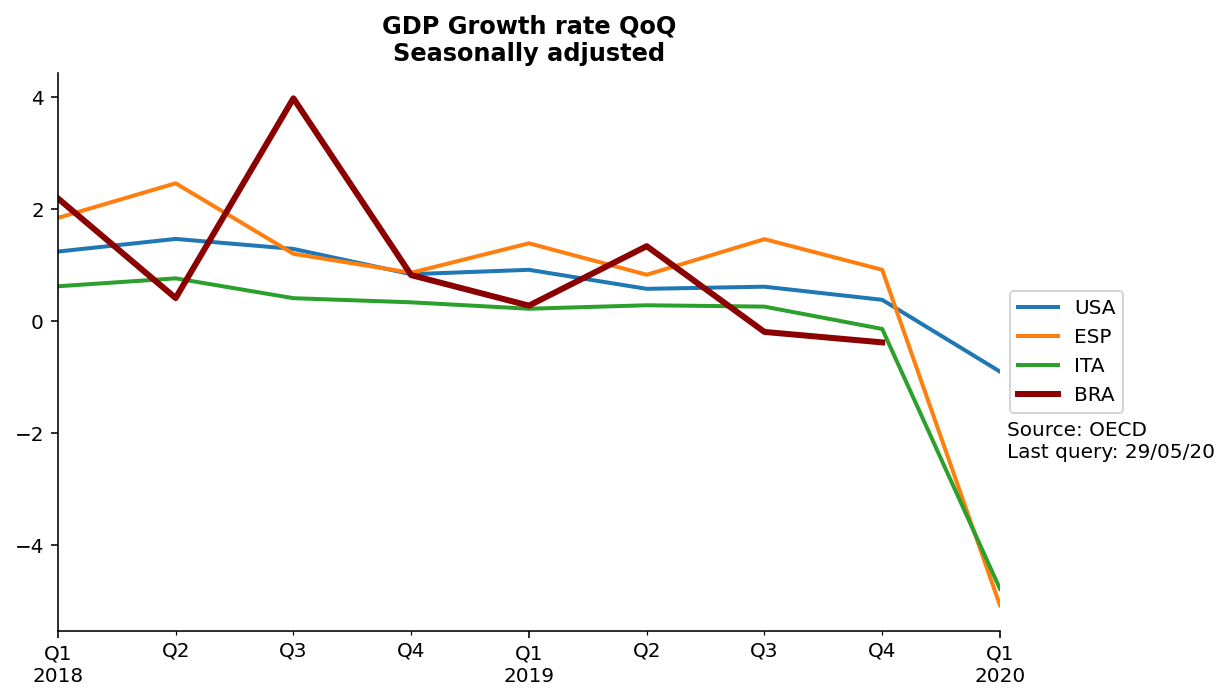

In [7]:
cases = ["USA", "ESP", "ITA", ]
source = f"Source: OECD\nLast query: {dt.today():%d/%m/%y}"

fig, ax = plt.subplots(figsize=(8,5))

df[cases].plot(ax=ax, lw=2)
df[["BRA"]].plot(ax=ax, lw=3, color='darkred',)
ax.set_title("GDP Growth rate QoQ\nSeasonally adjusted", fontweight='bold')
fig.text(0.88, .35, source, ha='left')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
sns.despine()
plt.show()

In [8]:
# df = web.DataReader(
#     'QNA', # https://stats.oecd.org/Index.aspx?DataSetCode=QNA
#     'oecd', 
#     start=dt(2018,3,31),
#     end=dt(2018,6,30)
# )
# df = df.transpose().loc[(
#     'B1_GE: Gross domestic product - expenditure approach',
#     'GPSA: Growth rate compared to previous quarter, seasonally adjusted',
#     #'GYSA: Growth rate compared to the same of previous year, seasonally adjusted',
#     'Quarterly'
# ),:]
# df = df.reset_index()
# df = df[df["Frequency"] == "Quarterly"].drop(["Frequency"], axis='columns')
# df = df.transpose()
# df